In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from scipy.stats import mstats
%matplotlib inline

# Suppress harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [78]:
df = pd.read_csv('/Users/Stephanie/desktop/thinkful/projects/3_bootcamp/U3L1P4/InfantData.csv')

In [79]:
df.head()

,COUNTY,Cases,Hospitalizations,Deaths,Case_Rate
0,ALAMEDA,10,3,0,1.0
1,ALPINE,0,0,0,0.0
2,AMADOR,0,0,0,0.0
3,BUTTE,6,5,0,5.1
4,CALAVERAS,0,0,0,0.0


In [80]:
X = df.Cases.values.reshape(-1, 1)
Y = df.Hospitalizations.values.reshape(-1, 1)

In [81]:
X_wins = mstats.winsorize(X, limits=0.05)
Y_wins = mstats.winsorize(Y, limits=0.05)

Score: 
 0.9551830698549397


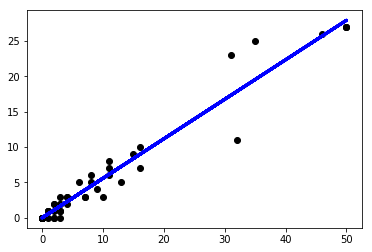

In [82]:
regr = linear_model.LinearRegression()
regr.fit(X_wins, Y_wins)

# Display the attributes we calculated.
print('Score: \n', regr.score(X_wins, Y_wins))

# Plot outputs
plt.scatter(X_wins, Y_wins, color='black')
plt.plot(X_wins, regr.predict(X_wins), color='blue', linewidth=3)
plt.show()

Score: 
 0.9947002157107064


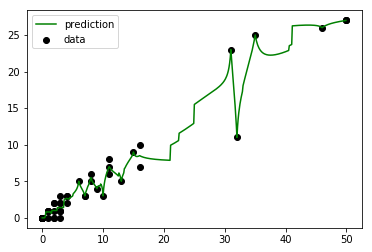

In [83]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_wins, Y_wins)

T = np.arange(0, 50, 0.1)[:, np.newaxis]
Y_ = knn.predict(T)

# Display the attributes we calculated.
print('Score: \n', knn.score(X_wins, Y_wins))

# Plot outputs
plt.scatter(X_wins, Y_wins, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.show()

In [84]:
str(type(regr)).split('.')[-1]

"LinearRegression'>"

In [85]:
score

array([-0.13014313,  0.91332651,  0.89880205,  0.97024496,  0.76793833])

In [86]:
for mod in (regr, knn):
    score = cross_val_score(mod, X_wins, Y_wins, cv=5)
    model = str(type(mod)).split('.')[-1]
    print('score of {} = mean:{}, std:{}'.format(model, score.mean(), score.std()))
    print('folds score: {}\n'.format(score))


score of LinearRegression'> = mean:0.8537921142222373, std:0.20716755296672615
folds score: [0.44020966 0.95625641 0.96725426 0.9704385  0.93480175]

score of KNeighborsRegressor'> = mean:0.6800483442388215, std:0.4570060845587985
folds score: [-0.22694025  0.91098783  0.94757269  0.9658458   0.80277564]

